In [1]:
import pandas as pd

In [ ]:
df = pd.read_csv("google_ads_data.csv")
#load dataset

In [ ]:
df.head()
#display first 5 rows

,ad_type,impressions,spend_usd,geo_targeting_included
0,Video,<=10k,100-1k,Alaska
1,Image,10k-100k,100-1k,Nebraska
2,Image,100k-1M,100-1k,Nebraska
3,Text,10k-100k,100-1k,Oregon
4,Image,100k-1M,100-1k,Idaho


In [ ]:
df.info()
#displaying columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164998 entries, 0 to 164997
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ad_type                 164998 non-null  object
 1   impressions             164998 non-null  object
 2   spend_usd               164998 non-null  object
 3   geo_targeting_included  164998 non-null  object
dtypes: object(4)
memory usage: 5.0+ MB


In [ ]:
df.describe()
#summary of statistics

,ad_type,impressions,spend_usd,geo_targeting_included
count,164998,164998,164998,164998
unique,3,5,5,50
top,Video,<=10k,<100,Arizona
freq,79098,105836,94878,12763


In [6]:
df.isnull().sum()
#check for nulls

ad_type                   0
impressions               0
spend_usd                 0
geo_targeting_included    0
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)

In [11]:
# Remove non-numeric characters and convert to integer
df["impressions"] = df["impressions"].str.replace(r"[^\d]", "", regex=True).astype(int)


int64


,ad_type,impressions,spend_usd,geo_targeting_included
0,Video,10,100-1k,Alaska
1,Image,10100,100-1k,Nebraska
2,Image,1001,100-1k,Nebraska
3,Text,10100,100-1k,Oregon
4,Image,1001,100-1k,Idaho


In [15]:
print(df.dtypes)  # Should show "int64" for impressions and "float64" for spend_usd


ad_type                   object
impressions                int64
spend_usd                 object
geo_targeting_included    object
dtype: object


In [18]:
import pandas as pd
import numpy as np

# Function to clean spend_usd column
def clean_spend(value):
    value = value.replace("$", "").replace(",", "").replace(">", "").replace("<", "").strip()  # Remove symbols

    # Handle cases where there's a range (e.g., "100-1k")
    if "-" in value:
        low, high = value.split("-")
        low = low.strip()
        high = high.strip()

        # Convert "1k" to "1000" for proper calculation
        if "k" in low:
            low = low.replace("k", "")
            low = float(low) * 1000  # Convert to number

        if "k" in high:
            high = high.replace("k", "")
            high = float(high) * 1000  # Convert to number

        return (float(low) + float(high)) / 2  # Take the average of min & max

    # Convert standalone "1k" to 1000
    if "k" in value:
        return float(value.replace("k", "")) * 1000

    return float(value)  # Convert to float for normal numbers

# Apply cleaning function
df["spend_usd"] = df["spend_usd"].apply(clean_spend)

# Verify the data type
print(df["spend_usd"].dtype)  # Should print: float64
df.head()


float64


,ad_type,impressions,spend_usd,geo_targeting_included
0,Video,10,550.0,Alaska
1,Image,10100,550.0,Nebraska
2,Image,1001,550.0,Nebraska
3,Text,10100,550.0,Oregon
4,Image,1001,550.0,Idaho


In [19]:
df["CPM"] = (df["spend_usd"] / df["impressions"]) * 1000
df.head()


,ad_type,impressions,spend_usd,geo_targeting_included,CPM
0,Video,10,550.0,Alaska,55000.000000
1,Image,10100,550.0,Nebraska,54.455446
2,Image,1001,550.0,Nebraska,549.450549
3,Text,10100,550.0,Oregon,54.455446
4,Image,1001,550.0,Idaho,549.450549


In [20]:
cpm_by_ad_type = df.groupby("ad_type")["CPM"].mean().reset_index()
print(cpm_by_ad_type)


  ad_type            CPM
0   Image  239783.161081
1    Text  377101.808127
2   Video  372383.749891


In [21]:
cpm_by_geo = df.groupby("geo_targeting_included")["CPM"].mean().reset_index()
print(cpm_by_geo)


   geo_targeting_included           CPM
0                 Alabama  4.683959e+05
1                  Alaska  2.182694e+05
2                 Arizona  2.530550e+05
3                Arkansas  2.417254e+05
4              California  7.749484e+05
5                Colorado  1.465605e+05
6             Connecticut  2.472139e+04
7                Delaware  1.374590e+05
8                 Florida  1.071501e+06
9                 Georgia  5.212151e+05
10                 Hawaii  3.070378e+04
11                  Idaho  1.666816e+05
12               Illinois  8.039161e+05
13                Indiana  1.557988e+05
14                   Iowa  2.454971e+05
15                 Kansas  1.551396e+05
16               Kentucky  1.946054e+05
17              Louisiana  1.606496e+05
18                  Maine  1.468927e+05
19               Maryland  1.498360e+05
20          Massachusetts  1.665931e+05
21               Michigan  3.268268e+05
22              Minnesota  2.175537e+05
23            Mississippi  1.703075e+05


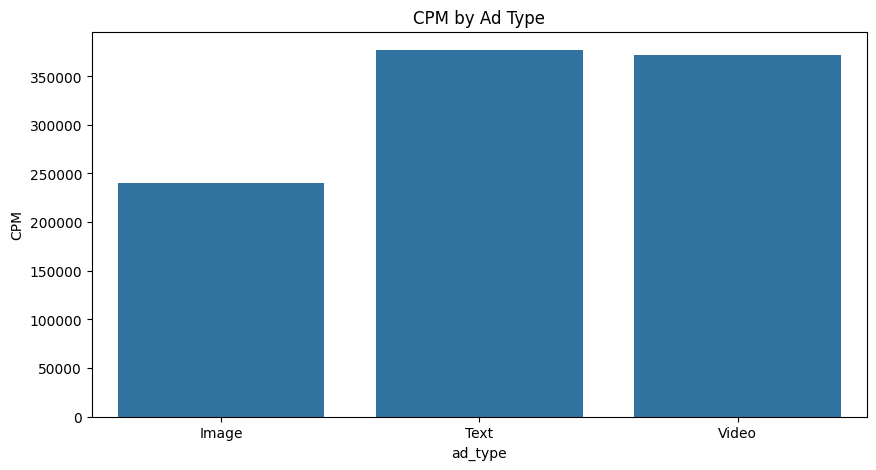

In [22]:
import seaborn as sns  
import matplotlib.pyplot as plt  

plt.figure(figsize=(10, 5))
sns.barplot(x="ad_type", y="CPM", data=cpm_by_ad_type)
plt.title("CPM by Ad Type")
plt.show()


In [23]:
lowest_cpm_geo = df.groupby("geo_targeting_included")["CPM"].mean().nsmallest(5).reset_index()
print("Top 5 Cheapest Geo Locations for Ads:")
print(lowest_cpm_geo)


Top 5 Cheapest Geo Locations for Ads:
  geo_targeting_included            CPM
0           Rhode Island   11969.710757
1            Connecticut   24721.394942
2                 Hawaii   30703.783016
3               New York  133382.176862
4           North Dakota  134754.297800


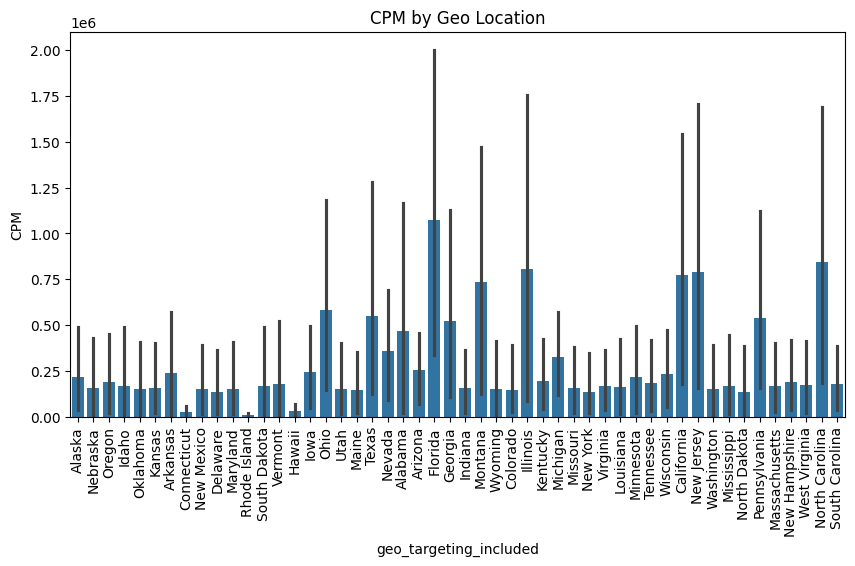

In [25]:
import seaborn as sns  
import matplotlib.pyplot as plt  

plt.figure(figsize=(10, 5))
sns.barplot(x="geo_targeting_included", y="CPM", data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.title("CPM by Geo Location")
plt.show()


In [24]:
most_expensive_ad_type = df.groupby("ad_type")["CPM"].mean().nlargest(1).reset_index()
print("Most Expensive Ad Type:")
print(most_expensive_ad_type)


Most Expensive Ad Type:
  ad_type            CPM
0    Text  377101.808127


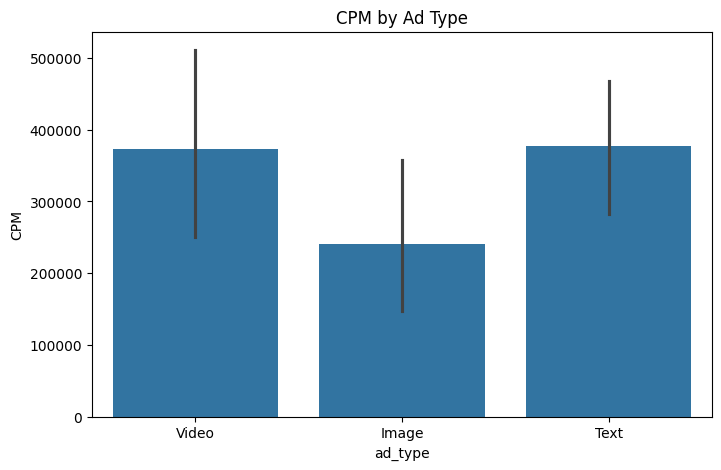

In [26]:
plt.figure(figsize=(8, 5))
sns.barplot(x="ad_type", y="CPM", data=df)
plt.title("CPM by Ad Type")
plt.show()
